In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import csv
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC
from sklearn import svm

In [ ]:
#data is used to predict

In [2]:
data = pd.read_csv('classification_dataset.csv')

In [ ]:
#data2 is just uesd to do data variable description(especially graph)

In [11]:
data2 = pd.read_csv('test_3980_train.csv')

In [3]:
data.dropna(inplace=True)

In [4]:
#data description

In [5]:
data.shape

(39736, 14)

In [6]:
data.head()

loan_amnt  term  emp_length  if_mortgage  if_own  if_rent  annual_inc  \
0      35000    60          10            1       0        0    110000.0   
1       9500    36          10            0       0        1     54000.0   
2       3800    36           1            1       0        0     47000.0   
3      12400    60           9            0       1        0     65004.0   
4       4000    60           4            0       0        1     45000.0   

   verification_status    dti  delinq_2yrs  inq_last_6mths  open_acc  \
0                    1   1.06            0               0        10   
1                    1  17.69            0               1         6   
2                    1  22.52            0               3        10   
3                    1   6.26            0               3        11   
4                    1   7.37            0               0        10   

   revol_util  loan_status  
0       0.064  Charged Off  
1       0.853   Fully Paid  
2       0.393  Charged Off  
3       0.775  Charged Off  
4       0.825  Charged Off

In [7]:
df2=pd.DataFrame(data.corr())
df2

loan_amnt      term  emp_length  if_mortgage    if_own  \
loan_amnt             1.000000  0.361830    0.161807     0.176974 -0.037123   
term                  0.361830  1.000000    0.110028     0.107544 -0.012928   
emp_length            0.161807  0.110028    1.000000     0.238767  0.004350   
if_mortgage           0.176974  0.107544    0.238767     1.000000 -0.258724   
if_own               -0.037123 -0.012928    0.004350    -0.258724  1.000000   
if_rent              -0.155867 -0.097215   -0.238738    -0.852629 -0.274859   
annual_inc            0.271239  0.046673    0.122056     0.198140 -0.045633   
verification_status   0.323831  0.245267    0.054815     0.050618 -0.034415   
dti                   0.066613  0.082735    0.051392    -0.019743 -0.003688   
delinq_2yrs          -0.031528  0.006485    0.015959     0.015226  0.005916   
inq_last_6mths        0.009405  0.040851    0.009805     0.074450  0.004017   
open_acc              0.176344  0.049942    0.100769     0.202788 -0.021212   
revol_util            0.067147  0.071110    0.020315    -0.068115 -0.052392   

                      if_rent  annual_inc  verification_status       dti  \
loan_amnt           -0.155867    0.271239             0.323831  0.066613   
term                -0.097215    0.046673             0.245267  0.082735   
emp_length          -0.238738    0.122056             0.054815  0.051392   
if_mortgage         -0.852629    0.198140             0.050618 -0.019743   
if_own              -0.274859   -0.045633            -0.034415 -0.003688   
if_rent              1.000000   -0.173053            -0.030894  0.023014   
annual_inc          -0.173053    1.000000             0.107159 -0.122679   
verification_status -0.030894    0.107159             1.000000  0.038075   
dti                  0.023014   -0.122679             0.038075  1.000000   
delinq_2yrs         -0.020002    0.022843             0.008046 -0.034712   
inq_last_6mths      -0.077224    0.034288             0.008301  0.001221   
open_acc            -0.190060    0.158045             0.054412  0.288221   
revol_util           0.096900    0.018292             0.061797  0.278053   

                     delinq_2yrs  inq_last_6mths  open_acc  revol_util  
loan_amnt              -0.031528        0.009405  0.176344    0.067147  
term                    0.006485        0.040851  0.049942    0.071110  
emp_length              0.015959        0.009805  0.100769    0.020315  
if_mortgage             0.015226        0.074450  0.202788   -0.068115  
if_own                  0.005916        0.004017 -0.021212   -0.052392  
if_rent                -0.020002       -0.077224 -0.190060    0.096900  
annual_inc              0.022843        0.034288  0.158045    0.018292  
verification_status     0.008046        0.008301  0.054412    0.061797  
dti                    -0.034712        0.001221  0.288221    0.278053  
delinq_2yrs             1.000000        0.007860  0.011967   -0.042995  
inq_last_6mths          0.007860        1.000000  0.091731   -0.068645  
open_acc                0.011967        0.091731  1.000000   -0.089662  
revol_util             -0.042995       -0.068645 -0.089662    1.000000

In [8]:
data['loan_status'].value_counts()

Fully Paid     34082
Charged Off     5654
Name: loan_status, dtype: int64

C:\Users\10718\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\10718\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\10718\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\10718\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


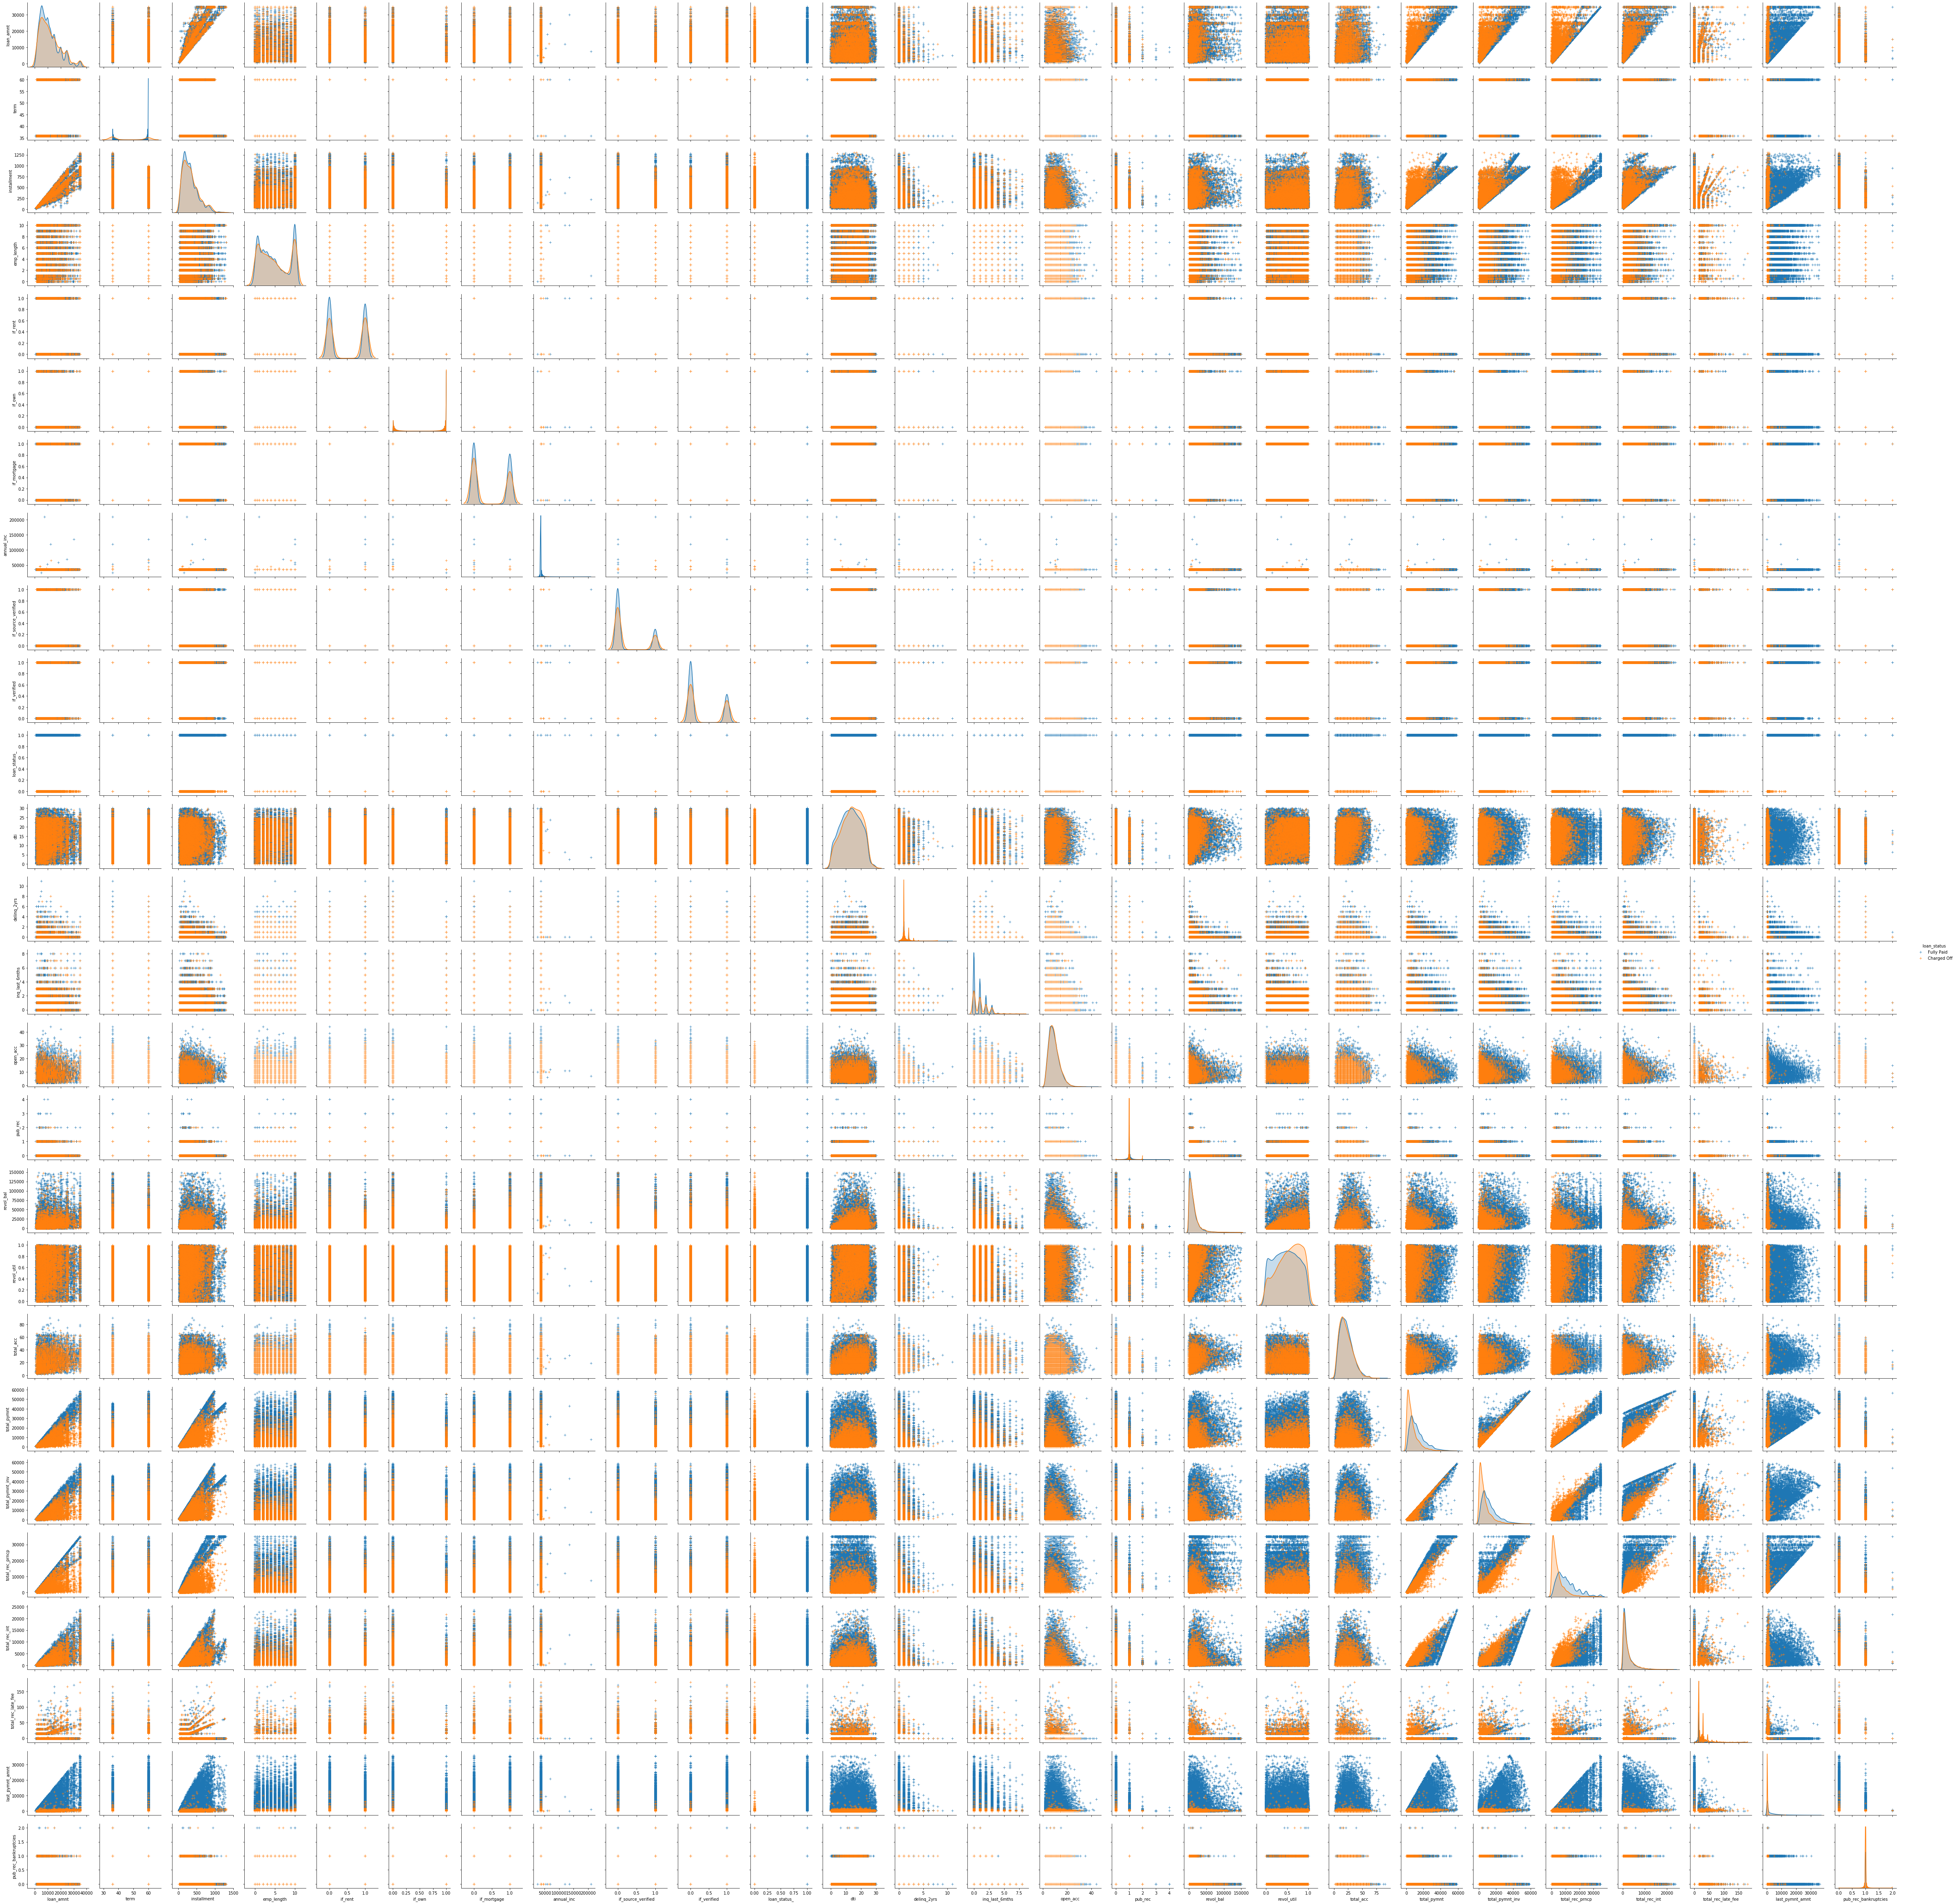

In [14]:
tmp = data2.drop('Id', axis=1)
g = sns.pairplot(tmp,hue='loan_status', markers='+')
plt.show()

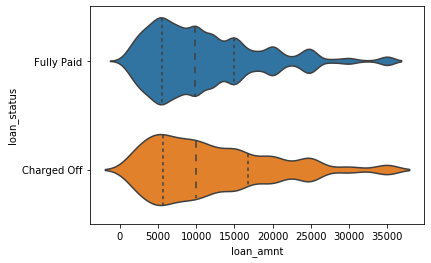

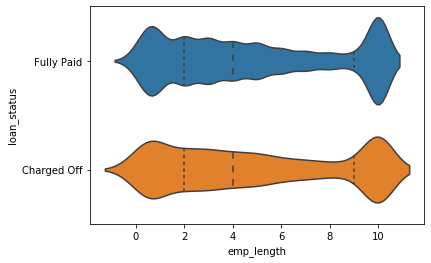

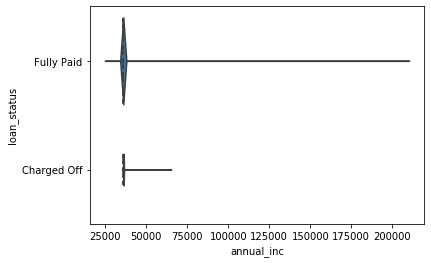

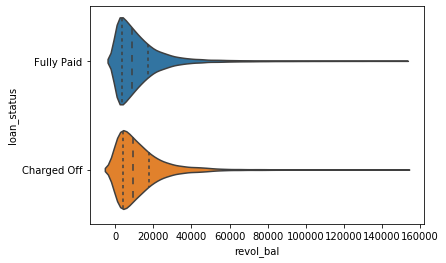

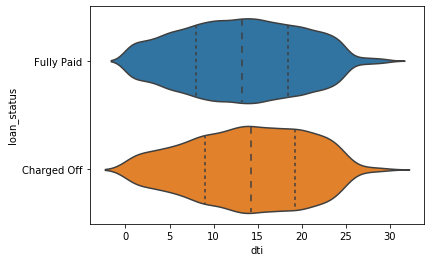

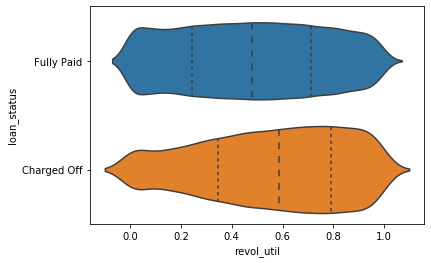

In [19]:
g = sns.violinplot(y='loan_status', x='loan_amnt', data=data2, inner='quartile')
plt.show()
g = sns.violinplot(y='loan_status', x='emp_length', data=data2, inner='quartile')
plt.show()
g = sns.violinplot(y='loan_status', x='annual_inc', data=data2, inner='quartile')
plt.show()
g = sns.violinplot(y='loan_status', x='revol_bal', data=data2, inner='quartile')
plt.show()
g = sns.violinplot(y='loan_status', x='dti', data=data2, inner='quartile')
plt.show()
g = sns.violinplot(y='loan_status', x='revol_util', data=data2, inner='quartile')
plt.show()


In [ ]:
#data analysis

In [20]:
# Pandas ".iloc" expects row_indexer, column_indexer  
X = data.iloc[:,:-1].values
# Now let's tell the dataframe which column we want for the target/labels.  
y = data['loan_status']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10,random_state=27)

In [22]:
print(X_train)  
print(y_train)

[[7.20e+03 3.60e+01 2.00e+00 ... 1.00e+00 1.20e+01 5.75e-01]
 [2.10e+04 6.00e+01 1.00e+00 ... 0.00e+00 1.40e+01 9.45e-01]
 [1.00e+04 3.60e+01 3.00e+00 ... 3.00e+00 7.00e+00 9.49e-01]
 ...
 [2.00e+04 6.00e+01 4.00e+00 ... 2.00e+00 1.60e+01 9.60e-02]
 [3.00e+04 6.00e+01 2.00e+00 ... 2.00e+00 9.00e+00 9.73e-01]
 [7.20e+03 3.60e+01 7.00e+00 ... 2.00e+00 7.00e+00 5.73e-01]]
28734     Fully Paid
11943     Fully Paid
21480    Charged Off
31940     Fully Paid
34067     Fully Paid
            ...     
29989     Fully Paid
4848      Fully Paid
14879     Fully Paid
36680     Fully Paid
5139      Fully Paid
Name: loan_status, Length: 35762, dtype: object


In [23]:
#Polynomial Kernel

In [24]:
svclassifier = SVC(kernel='poly', degree=8)
svclassifier.fit(X_train, y_train)

C:\Users\10718\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=8, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [25]:
y_pred = svclassifier.predict(X_test)

In [26]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(4000)
df1

Actual   Predicted
3767    Fully Paid  Fully Paid
18233   Fully Paid  Fully Paid
7941    Fully Paid  Fully Paid
19484  Charged Off  Fully Paid
25423   Fully Paid  Fully Paid
...            ...         ...
3919    Fully Paid  Fully Paid
21320   Fully Paid  Fully Paid
18297   Fully Paid  Fully Paid
39401   Fully Paid  Fully Paid
38820   Fully Paid  Fully Paid

[3974 rows x 2 columns]

In [27]:
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.863613487669854
[[   0  542]
 [   0 3432]]
              precision    recall  f1-score   support

 Charged Off       0.00      0.00      0.00       542
  Fully Paid       0.86      1.00      0.93      3432

    accuracy                           0.86      3974
   macro avg       0.43      0.50      0.46      3974
weighted avg       0.75      0.86      0.80      3974



C:\Users\10718\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[[   0    0]
 [ 542 3432]]


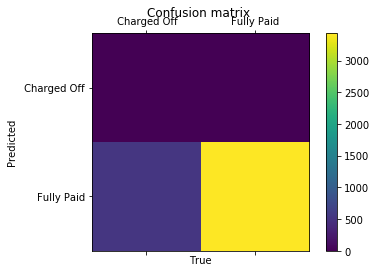

In [28]:
labels = [ ' Charged Off','Fully Paid']
cm = confusion_matrix( y_pred,y_test)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix ')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('True')
plt.ylabel('Predicted')
plt.show()

In [29]:
##Sigmoid Kernel

In [30]:
svclassifier = SVC(kernel='sigmoid')
svclassifier.fit(X_train, y_train)

C:\Users\10718\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='sigmoid', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [32]:
y_pred = svclassifier.predict(X_test)

In [33]:
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.863613487669854
[[   0  542]
 [   0 3432]]
              precision    recall  f1-score   support

 Charged Off       0.00      0.00      0.00       542
  Fully Paid       0.86      1.00      0.93      3432

    accuracy                           0.86      3974
   macro avg       0.43      0.50      0.46      3974
weighted avg       0.75      0.86      0.80      3974



C:\Users\10718\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[[   0    0]
 [ 542 3432]]


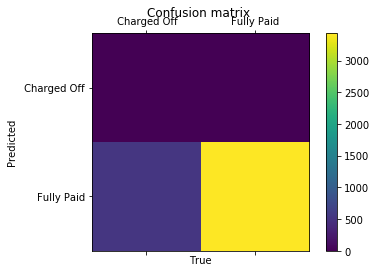

In [34]:
labels = [ ' Charged Off','Fully Paid']
cm = confusion_matrix( y_pred,y_test)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix ')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('True')
plt.ylabel('Predicted')
plt.show()

In [35]:
##Gaussian Kernel

In [36]:
SVC_model = svm.SVC()

In [37]:
SVC_model.fit(X_train, y_train)

C:\Users\10718\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [38]:
SVC_prediction = SVC_model.predict(X_test)

In [39]:
df = pd.DataFrame({'Actual': y_test, 'SVC_Predicted':SVC_prediction})
df1 = df.head(4000)
df1

Actual SVC_Predicted
3767    Fully Paid    Fully Paid
18233   Fully Paid    Fully Paid
7941    Fully Paid    Fully Paid
19484  Charged Off    Fully Paid
25423   Fully Paid    Fully Paid
...            ...           ...
3919    Fully Paid    Fully Paid
21320   Fully Paid    Fully Paid
18297   Fully Paid    Fully Paid
39401   Fully Paid    Fully Paid
38820   Fully Paid    Fully Paid

[3974 rows x 2 columns]

In [40]:
df.to_csv('test2new.csv')

In [41]:
# Accuracy score is the simplest way to evaluate
print(accuracy_score(SVC_prediction, y_test))
# But Confusion Matrix and Classification Report give more details about performance
print(confusion_matrix(y_test,SVC_prediction ))
print(classification_report(SVC_prediction, y_test))

0.8628585807750377
[[   1  541]
 [   4 3428]]
              precision    recall  f1-score   support

 Charged Off       0.00      0.20      0.00         5
  Fully Paid       1.00      0.86      0.93      3969

    accuracy                           0.86      3974
   macro avg       0.50      0.53      0.47      3974
weighted avg       1.00      0.86      0.93      3974



[[   1    4]
 [ 541 3428]]


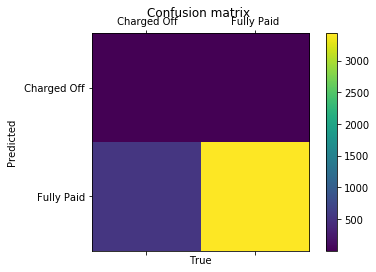

In [42]:
labels = [ ' Charged Off','Fully Paid']
cm = confusion_matrix( SVC_prediction,y_test)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix ')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('True')
plt.ylabel('Predicted')
plt.show()